In [9]:
# Using Ripser

import numpy as np
from ripser import ripser
from persim import plot_diagrams
import operator
import timeit

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

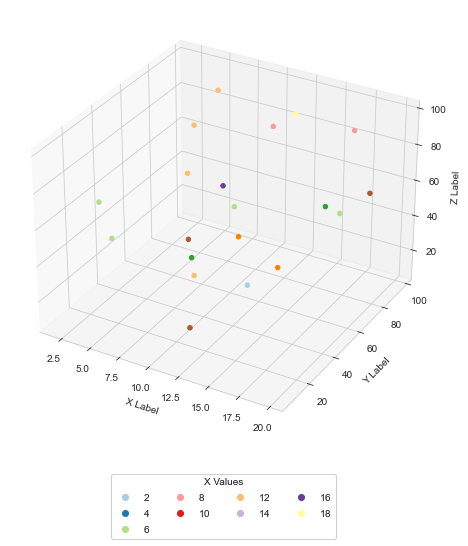

In [2]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = np.random.uniform(1,20,size=20)
y = np.random.uniform(1,100,size=20)
z = np.random.uniform(1,100,size=20)


g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="X Values", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()

In [10]:
def PersistenceLanscape2(A):
    L = np.array([])
    #L = []
    k = 0

    # Sort A: read from right to left inside ()
    ind =  np.lexsort((-A[:,1], A[:,0])) 
    A = A[ind]

    while len(A) != 0:

        # pop first term
        bd, A = A[0], A[1:len(A)] 
        b, d = bd

        # outer brackets for start of L_k
        L = np.insert(L, len(L), np.array([-np.inf, 0]) , axis = 0) 
        L = np.insert(L, len(L), np.array([b, 0]) , axis = 0) 
        L = np.insert(L, len(L), np.array([(b+d)/2, (d-b)/2]) , axis = 0) 
        #L.append([ [-np.inf, 0], [b, 0], [(b+d)/2, (d-b)/2] ] ) # outer brackets for start of L_k
        
        while (L[-1] != [np.inf, 0]).all():


            # Check if d is greater than all remaining pairs
            if (d  > A[:,1]).all(): # check dont need vector

                # add to end of L_k
                L = np.insert(L, len(L), np.array( [d,0] ), axis = 0)
                L = np.insert(L, len(L), np.array( [np.inf, 0] ), axis = 0)
                #L[k].extend([ [d,0], [np.inf, 0] ])

            else:
                # set (b', d')  to be the first term so that d' > d
                for i in range(len(A)):
                    if A[i][1] > d: 
                        # pop (b', d')

                        ind1 = [k for k in range(len(A) ) if k != i] 

                        bd_prime, A = A[i], A[ind1]

                        b_prime, d_prime = bd_prime
                        break


                # Case I    
                if b_prime > d:
                    L = np.insert(L, len(L), np.array([d, 0] ), axis = 0)
                    #L[k].extend([ [d, 0] ])

                # Case II
                if b_prime >= d:
                    L = np.insert(L, len(L), np.array( [b_prime, 0] ), axis = 0)
                    #L[k].extend([ [b_prime, 0] ])

                # Case III
                else:
                    L = np.insert(L, len(L), np.array([(b_prime + d)/2, (d-b_prime)/2]), axis = 0 ) 
                    #L[k].extend([ [(b_prime + d)/2, (d-b_prime)/2] ])

                    # Push (b', d) into A in order
                    # find the first b_i in A so that b'<= b_i
                    for i in range(len(A)):
                        if b_prime <= A[i][0]:
                            ind2 = i # index to push (b', d) if b' != b_i 
                            break

                    # if b' = b_i 
                    # move index to the right one for every d_i so that d < d_i 
                    if b_prime == A[ind2][0]:
                        A_i = A[ A[:,0] == b_prime]

                        for j in range(len(A_i)):
                            if d < A_i[j][1]:
                                ind2 = ind2 + 1


                    A = np.insert(A, ind2 ,np.array([b_prime, d]), axis = 0)


                L = np.insert(L, len(L), np.array([(b_prime + d_prime)/2, (d_prime-b_prime)/2] ), axis = 0 ) 
                #L[k].extend([ [(b_prime + d_prime)/2, (d_prime-b_prime)/2] ])

                b,d = b_prime, d_prime # Set (b',d')= (b, d)     
        k += 1
    return(L)

In [14]:
def PersistenceLanscape1(A):
    #L = np.array([])
    L = []
    k = 0

    # Sort A: read from right to left inside ()
    ind =  np.lexsort((-A[:,1], A[:,0])) 
    A = A[ind]

    while len(A) != 0:

        # pop first term
        bd, A = A[0], A[1:len(A)] 
        b, d = bd


        #L = np.extend(L, np.array([[-np.inf, 0], [b, 0], [(b+d)/2, (d-b)/2]]) ) # outer brackets for start of L_k
        L.append([ [-np.inf, 0], [b, 0], [(b+d)/2, (d-b)/2] ] ) # outer brackets for start of L_k

        while L[k][-1] != [np.inf, 0]:


            # Check if d is greater than all remaining pairs
            if (d  > A[:,1]).all(): # check dont need vector

                # add to end of L_k
                # L = np.append(L, np.array([ [d,0], [np.inf, 0] ]))
                L[k].extend([ [d,0], [np.inf, 0] ])

            else:
                # set (b', d')  to be the first term so that d' > d
                for i in range(len(A)):
                    if A[i][1] > d: 
                        # pop (b', d')

                        ind1 = [k for k in range(len(A) ) if k != i] 

                        bd_prime, A = A[i], A[ind1]

                        b_prime, d_prime = bd_prime
                        break


                # Case I    
                if b_prime > d:
                    #L = np.append(L, np.array([[d, 0] ]))
                    L[k].extend([ [d, 0] ])

                # Case II
                if b_prime >= d:
                    #L = np.append(L, np.array([ [b_prime, 0] ]))
                    L[k].extend([ [b_prime, 0] ])

                # Case III
                else:
                    #L = np.append(L, np.array([ [(b_prime + d)/2, (d-b_prime)/2] ]) ) 
                    L[k].extend([ [(b_prime + d)/2, (d-b_prime)/2] ])

                    # Push (b', d) into A in order
                    # find the first b_i in A so that b'<= b_i
                    for i in range(len(A)):
                        if b_prime <= A[i][0]:
                            ind2 = i # index to push (b', d) if b' != b_i 
                            break

                    # if b' = b_i 
                    # move index to the right one for every d_i so that d < d_i 
                    if b_prime == A[ind2][0]:
                        A_i = A[ A[:,0] == b_prime]

                        for j in range(len(A_i)):
                            if d < A_i[j][1]:
                                ind2 = ind2 + 1


                    A = np.insert(A, ind2 ,np.array([b_prime, d]), axis = 0)


                #L = np.append(L, np.array([ [(b_prime + d_prime)/2, (d_prime-b_prime)/2] ]) ) 
                L[k].extend([ [(b_prime + d_prime)/2, (d_prime-b_prime)/2] ])

                b,d = b_prime, d_prime # Set (b',d')= (b, d)     
        k += 1
    return(L)

In [16]:
A = np.array([ [1.0, 5.0], [2.0, 8.0], [3.0, 4.0], [5.0, 9.0], [6.0, 7.0] ]) 
L = PersistenceLanscape1(A)
L

[[[-inf, 0],
  [1.0, 0],
  [3.0, 2.0],
  [3.5, 1.5],
  [5.0, 3.0],
  [6.5, 1.5],
  [7.0, 2.0],
  [9.0, 0],
  [inf, 0]],
 [[-inf, 0], [2.0, 0], [3.5, 1.5], [5.0, 0], [6.5, 1.5], [8.0, 0], [inf, 0]],
 [[-inf, 0],
  [3.0, 0],
  [3.5, 0.5],
  [4.0, 0],
  [6.0, 0],
  [6.5, 0.5],
  [7.0, 0],
  [inf, 0]]]

In [21]:
A = np.array([ [1.0, 5.0], [2.0, 8.0], [3.0, 4.0], [5.0, 9.0], [6.0, 7.0] ]) 
L = PersistenceLanscape2(A)
L

array([-inf,  0. ,  1. ,  0. ,  3. ,  2. ,  3.5,  1.5,  5. ,  3. ,  6.5,
        1.5,  7. ,  2. ,  9. ,  0. ,  inf,  0. , -inf,  0. ,  2. ,  0. ,
        3.5,  1.5,  5. ,  0. ,  6.5,  1.5,  8. ,  0. ,  inf,  0. , -inf,
        0. ,  3. ,  0. ,  3.5,  0.5,  4. ,  0. ,  6. ,  0. ,  6.5,  0.5,
        7. ,  0. ,  inf,  0. ])

In [44]:
L1 = L[0:18]
L1 = np.reshape(L1, (9,2))
L1 = L1[1:-1]
L1

array([[1. , 0. ],
       [3. , 2. ],
       [3.5, 1.5],
       [5. , 3. ],
       [6.5, 1.5],
       [7. , 2. ],
       [9. , 0. ]])

In [45]:
L2 = L[18:32]
L2 = np.reshape(L2, (7,2))
L2 = L2[1:-1]
L2

array([[2. , 0. ],
       [3.5, 1.5],
       [5. , 0. ],
       [6.5, 1.5],
       [8. , 0. ]])

In [43]:
L3 = L[32:len(L)]
L3 = np.reshape(L3, (8,2))
L3 = L3[1:-1]
L3

array([[3. , 0. ],
       [3.5, 0.5],
       [4. , 0. ],
       [6. , 0. ],
       [6.5, 0.5],
       [7. , 0. ]])

In [47]:
L1x = L1[:,0]
L2x = L2[:,0]
L3x = L3[:,0]

L1y = L1[:,1]
L2y = L2[:,1]
L3y = L3[:,1]

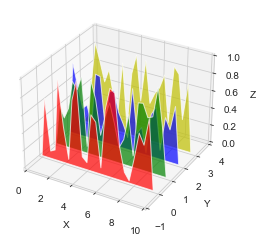

In [52]:
fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()


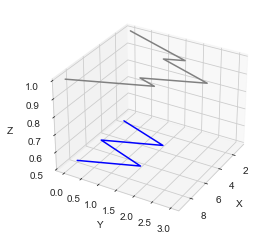

In [73]:
ax = plt.axes(projection='3d')

L1x = L1x
L1y = L1y
L1z = np.ones(len(L1x))

L2x = L2x
L2y = L2y
L2z = .5 *np.ones(len(L2x))

ax.plot3D(L1x, L1y, L1z, 'gray')
ax.plot3D(L2x, L2y, L2z, 'blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# rotate the axes and update

ax.view_init(30, 30)



Text(0.5, 0, 'Z')

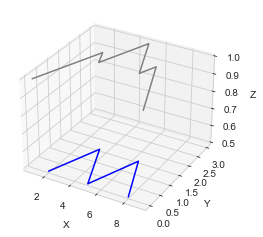

In [74]:
ax = plt.axes(projection='3d')

L1x = L1x
L1y = L1y
L1z = np.ones(len(L1x))

L2x = L2x
L2y = L2y
L2z = .5 *np.ones(len(L2x))

ax.plot3D(L1x, L1y, L1z, 'gray')
ax.plot3D(L2x, L2y, L2z, 'blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# rotate the axes and update



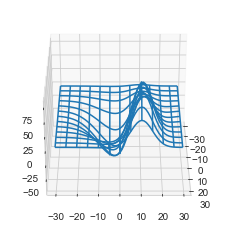

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [65]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)